# Introducing logistic regression

A logistic regression "squashes" a linear expression into a 0-1 range using a logistic, or sigmoidal, function.  That looks like this:

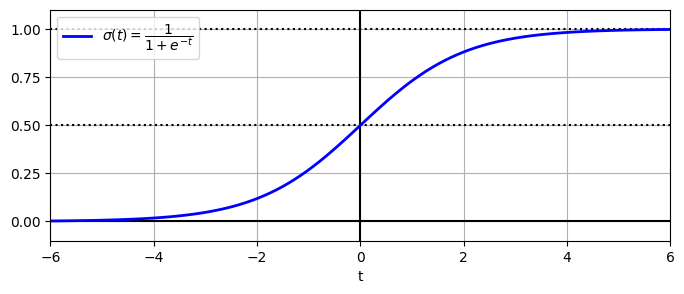

In [1]:
import numpy as np
import matplotlib.pyplot as plt
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

We'll demonstrate a logistic regression first by using the famous 'iris' dataset.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

We only care about data and target right now.  First, let's read the dataset description.

In [ ]:
print(iris.DESCR)

In [ ]:
iris.data.head(3)

In [ ]:
iris.target_names

In [ ]:
iris.target.head(3)

Note, by conventions the "targets" correspond t indices in the target names array.  So, the above are all 'setosa'.  As the slmplest form of a logistic reggression is binary classifier, let's focus just on predicting "virginica". We'll do that by relabeling our "targets".  By convention, we often use the variable `X` to refer to data, and `y` to refer to targets.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data.values
y = iris.target_names[iris.target] == 'virginica'

Now we create a train / test split, and then train the classifier.  See comments in code!

In [ ]:
# train test split creates four groups.  Random state is set here for replicability purposes, and is optional
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the machine learning model - this is typically how we do things in SciKit learn
log_reg = LogisticRegression(random_state=42)

# Train the clasifier
log_reg.fit(X_train, y_train)

Ok, great!  Now we can examine performance.  Typically, we'd do this by predicting classes, and the comparing the outcome.  Like this.

In [ ]:
# Here are the predictions
y_pred = log_reg.predict(X_test)

We can use any number of scoring routines from scikit learn to test our results. But let's do it manually first (this is just accuracy).


In [ ]:
n_correct = sum(y_pred == y_test)
print(n_correct / len(y_pred))

## Exercise 1:

Try adding some noise to your data and see how your accuracy changes.  Note that you can add noise to a matrix in numpy like this:

In [ ]:
sample = np.ones((10,10))
print("Original matrix")
print(sample)

# 0 is the mean, .3 is the standard deviation
# The last parameter is the shape of the matrix we want to retrieve
noise = np.random.normal(0,.3,sample.shape)
noisy_sample = sample + noise
print("\n\nNoisy matrix")
print(noisy_sample)


If you're feeling ambitious, create a loop and graph your accuracy across noise levels!  You'll want a function for this.

# Evaluating classifiers

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
import pprint
pp = pprint.PrettyPrinter(width=120)
pp.pprint(mnist.DESCR)

('**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n'
 '**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n'
 '**Please cite**:  \n'
 '\n'
 'The MNIST database of handwritten digits with 784 features, raw data available at: '
 'http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of '
 '10,000 examples  \n'
 '\n'
 'It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a '
 'fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition '
 'methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and '
 'white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect '
 'ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalizatio

In [ ]:
mnist.keys()  # extra code – we only use data and target in this notebook

Note, data and target exist for most sklearn datasets.  Data is a matrix of features, and target is a vector of labels.

In [4]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

If you wanted to see these as a DataFrame, you could do this:

In [ ]:
import pandas as pd
df = pd.DataFrame(mnist.data)
df["target"] = mnist.target
df

But that's not really necessary here.  We'll just use these things as matrices and arrays.  Let's look at the shape here.

In [ ]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")
print(f"Is number of rows equal? {X.shape[0] == y.shape[0]}")

Where does the 784 come from?  Read the docs above!

In [ ]:
28 * 28

Let's take a look at one of these images

In [ ]:
import matplotlib.pyplot as plt

# Define function to plot a single digit
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

What is it?

In [5]:
y[0]

'5'

Here's another sample:

In [6]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

NameError: name 'plt' is not defined

### Training the classfier

Once again, since we're using logistic regression, let's just go with predicting '5s'.

In [7]:
from sklearn.preprocessing import StandardScaler
# Setting up the data here
# Though it's not really necessary here (MINST variables are all roughly the same) it's often useful to z-score
# your data.  Especially important for logistic regression
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Arbitratily taking the first 60000 rows here
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [8]:
# I'm going to use the SGDClassifier here - it's a lot like a logistic regression with an "sag" solver,
# but is a lot faster with larger data sets

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [9]:
# Recall we already checked that X[0] is a five
some_digit = X[0]

# Note that predict expect an array of values, so we tuck this into an array before testing.
sgd_clf.predict([some_digit])

array([ True])

## Performance measures

### Measuring accuracy with cross-validation

In [16]:
from sklearn.model_selection import cross_val_score

# Scikit learn makes it easy to use cross validation with simple measures
# CV is the number of folds
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [17]:
# _ is the output of the last performance measure
scores = _

In [18]:
import numpy as np
np.mean(scores)

0.9570333333333334

# Exercise 2

Go ahead and dig into the docs to use the following scoring methods, reporting the average for each (note `np.mean` will return average over an array)

1. Precision
2. Recall
3. F1 scores

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer

scoring = make_scorer(precision_score)

# You can change how you are socoring just change scoring method
precision_scoring = make_scorer(precision_score)
precisions = cross_val_score(sgd_clf, X_train, y_train_5 , cv=3, scoring = precision_scoring)

In [25]:
precisions

array([0.95936795, 0.89060092, 0.74963109])

In [23]:
cross_val_score(sgd_clf, X_train, y_train_5 , cv=3, scoring = "f1_macro")

array([0.80232463, 0.86155602, 0.88592367])

In [31]:
from sklearn.metrics import confusion_matrix

matrix_scoring = make_scorer(confusion_matrix)
precisions = cross_val_score(sgd_clf, X_train, y_train_5 , cv=3, scoring = matrix_scoring)
precisions

ValueError: scoring must return a number, got [[18157    36]
 [  957   850]] (<class 'numpy.ndarray'>) instead. (scorer=score)

If you want more control over your classifier, use the `KFold` and related classes.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import f1_score

skfolds = StratifiedKFold(n_splits=3, shuffle = True)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # It's a good idea to use a fresh, untrained model each time you run on new data
    # The "clone" command does that, but simplifies things by copying other parameters
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9678
0.9661
0.9545


Seems quite good!  But also always useful to compare to a naive classifer.  The `DummyClassifier` is one such instance.

In [34]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.90965, 0.90965, 0.90965])

## Confusion Matrix

Instead of `cross_val_score` we can just use `cross_val_predict` to get the raw predictions - sklearn takes care of compiling our results so they are easy to process

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [36]:
y_train_5.shape == y_train_pred.shape

True

In [37]:
# You've hopefully already found the sklearn metrics library
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [38]:
# Just to get a sense of things, see what happens if we had a perfect predictor

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [39]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [40]:
# Same computation, using the confusion matrix above
# TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [41]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [42]:
# TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [43]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [44]:
# Calculating by hand
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Precision/ Recall Trade-off

In [45]:
# The "decision_function" method returns the raw value, of the predictor, which is then 
# thresholded to achieve an outcome

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [46]:
# We can plug this directly into cross_val_predict to get the scores across all of our data
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

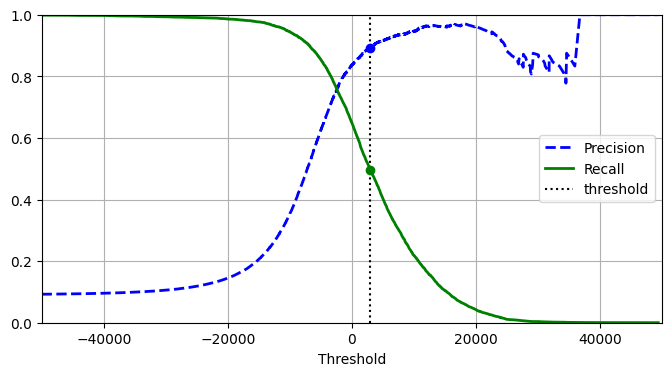

In [53]:
# Scikit learn gives us a really nice way to look at this!
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
threshold = 3000
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")


plt.show()

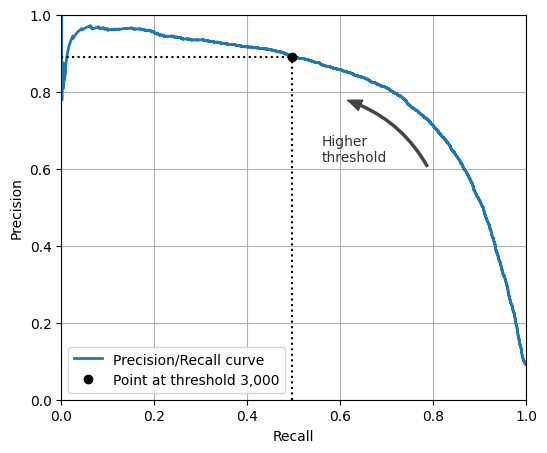

In [48]:
# We can graph these two together:

import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

#line that generates plot
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# fancy plotting gizmos
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [54]:
# With this analysis, we can arbitrarily obtain a threshold to achieve a given level of precision or recall:

idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision] 
threshold_for_90_precision

3370.0194991439557

# Exercise 3

1. What is recall at this threshold?  F1 score?
2. Can you do the same thing, except optimizing to achieve recall > .6?

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

In [59]:
# recall_score 
print("recall_score:")
print(threshold_for_90_precision / (cm[1, 0] + cm[1, 1])) # 3530 / (1891 + 3530)
#precisions score
print("precision_score:")
print(threshold_for_90_precision / (cm[0, 1] + cm[1, 1])) # == 3530 / (687 + 3530)
print("f1 score")
print(threshold_for_90_precision / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2))

recall_score:
0.621660117901486
precision_score:
0.7991509364818487
f1 score
0.6993192569296443


## ROC Curves

In [ ]:
# SciKit learn also gives us ROC curves for free

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# just beautifies the figure
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

## Training and Testing with Scikit Learn

SciKit Learn has a rich API for splitting your data into train and test sets.  I'll review some of these methods here.

As a working example, we'll use the `wine` dataset, which is focused on predicting the quality of wine based on it's chemical makeup.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")
wine_data

We'll divide wines into `good` quality and `bad` quality by selecting all wines with a quality score of 7 or more.

In [ ]:
# Create binary classification target variable
wine_data['quality_label'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Features and Target
X = wine_data.drop(['quality', 'quality_label'], axis=1)
y = wine_data['quality_label']


### Train-Test Split

The simplest way to evaluate the performance of a machine learning algorithm is to use different datasets for training and testing. Scikit-learn has a `train_test_split` function that makes it easy to divide your data.  We did this above.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Let's scale our data first


# train test split creates four groups.  Random state is set here for replicability purposes, and is optional
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create the machine learning model - this is typically how we do things in SciKit learn
log_reg = LogisticRegression(random_state=42)

# Train the clasifier
log_reg.fit(X_train_scaled, y_train)
# Here are the predictions
y_pred = log_reg.predict(X_test_scaled)
n_correct = sum(y_pred == y_test)
print(n_correct / len(y_pred))


### Cross-Validation

In cross-validation, the data is divided into `k` subsets (or "folds"). The model is trained on `k-1` of these subsets and tested on the remaining one. This process is repeated `k` times, each time with a different subset as the test set.

#### K-Folds

The standard `KFold` cross-validator divides the dataset into `k` different folds. During each round of training and testing, a different fold is used as the test set.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=5, random_state=42, shuffle=True)
# Initialize Logistic Regression and StandardScaler
clf = LogisticRegression(random_state=42)
scaler = StandardScaler()

# Initialize list to store accuracy for each fold
accuracy_list = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into current train and test set
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

# Calculate and print the average accuracy
average_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Average Accuracy: {average_accuracy}')

SKLearn's `cross_val_score` validator simplifies this process.  In order to scale each data set separately though, we'll have to use a `Pipeline`, which chains together multiple operations.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('classifier', LogisticRegression())  # Step 2: Train a logistic regression model
])
# Use cross_val_score to get the scores for each fold
scores = cross_val_score(pipeline, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Scikit-learn provides a variety of scoring methods that can be passed as a parameter to functions like `cross_val_score`. The `scoring` parameter allows you to specify a string representing a built-in scoring metric or even pass a custom scoring function.

Here's how you can do it with F1 score.  Note the 'macro' designator indicates that we are taking the balanced average of scores across all classes (rather than an average weighted by class membership).



In [ ]:

from sklearn.metrics import make_scorer, f1_score
f1_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')
print("F1 scores for each fold:", f1_scores)
print("Mean F1 score:", f1_scores.mean())


We can also build a composite scorer that calculates multiple scores.  In the following, we use `cross_validate` instead of `cross_validate_score`, because the later will only return an array of single scores.  We'll also include `train_scores` here.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate

scoring = {
    'f1': 'f1_macro',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro')
}

# Using multiple metrics
scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring,return_train_score=True)
for key, values in scores.items():
    print(f"{key}: {values.mean():.3f} (+/- {values.std() * 2:.3f})")


Note also that while SciKit provides a `StratifiedKFold` class, it does not have a stratified version of the `cross_val_score` function.  However, we can pass a stratified kfold class to the cross_fold_validator, like this:

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Create a stratified K-Fold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score with stratified K-Fold
clf = LogisticRegression()
scores = cross_val_score(pipeline, X, y, cv=stratified_kfold, scoring='accuracy')
scores


Finally, we can apply a "Leave One Out" cross fold validator if we really want to.  Keep in mind that LOO can be computationally expensive for large datasets because it will train a new model for each sample in the dataset. It's generally used for small datasets or for cases where a high-variance estimate is acceptable.  Note, we'll only do this with a sample dataset, because it is computationally expensive to run.

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Create a dataset
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=0,
flip_y=0, n_features=20, n_clusters_per_class=1,
n_samples=100, random_state=42)

# Create a Leave-One-Out object
loo = LeaveOneOut()

# Use cross_val_score with Leave-One-Out
clf = LogisticRegression()
scores = cross_val_score(clf, X, y, cv=loo, scoring='accuracy')

print(f"Mean Accuracy: {scores.mean():.2f}")

# Exercise 4

1 - Use cross fold validation to evaluate average performance (F1-score) for the "Wine" dataset with folds from 3 - 10.  Plot both the average and std. err.

# Data Loading and Preprocessing

One of the most common forms (but certainly not the only!) of data is the CSV file.  CSV files typically store tabular data where each line represents a row and columns are separated by a delimiter, which is commonly a comma.

For example:
```
Name, Age, Gender
Alice, 29, Female
Bob, 35, Male
```



### Reading CSV Files
You can use the `read_csv` function from the `pandas` library to read a CSV file.

In [ ]:
import pandas as pd
data = pd.read_csv("data/fruits.csv")
data



### Different Delimiters
Not all files use a comma as a delimiter. Some may use tabs, semicolons, or other characters.

In [ ]:
# A tab delimited file
import pandas as pd
data = pd.read_csv("data/fruits.tsv",delimiter="\t")
data

In [ ]:
# A semi-colon delimited file
import pandas as pd
data = pd.read_csv("data/fruits-semicolon.csv",delimiter=";")
data

# Exercise 5

Read the bank data in from your homework assignment!  Just use the "bank" data for now.

### Type Inferencing
Pandas tries to infer the data types of each column automatically, but sometimes it may not work as expected. You can explicitly specify types using the `dtype` parameter, and there is a special handling function for dates.

In [ ]:
# Look at the fruits data
fruits = pd.read_csv("data/fruits.csv")
print(fruits.dtypes)
fruits

In [ ]:
# Note that the date wasn't parsed, and that the `count` column should really be an integer
fruits = pd.read_csv("data/fruits.csv",dtype={'count':int},parse_dates=['Date'])
print(fruits.dtypes)
fruits
 

Note that pandas treats "null" values as floats by default, so even though we told it to treat "Count" as an int, it still read it as a float!  We can take care of that by converting the column to "Int64" which pandas introduced to handle missing values in integer columns.

In [ ]:
fruits['Count'] = fruits['Count'].astype('Int64')
print(fruits.dtypes)
fruits

### Data Cleaning Issues
Data often requires cleaning before it can be analyzed or used for building models. Two useful things to remember:

1. **Dropping unnecessary columns**: 
    ```python
    df.drop(['column_name'], axis=1, inplace=True)
    ```
   
2. **Dropping duplicates**: 
    ```python
    df.drop_duplicates(inplace=True)


In [ ]:
# Note that without "inplace=True" this won't modify the original data
fruits.drop(["Cost"],axis=1,inplace=True)
fruits



### Handle Nulls and Missing Values
Pandas will automatically detect common representations of missing values (`NA`, `NaN`, etc.). You can specify additional symbols using the `na_values` parameter.

```python
df = pd.read_csv('file.csv', na_values=['n/a', '??'])
```

Once we have a data frame with nulls, we have to figure out what to do with them.  Here are some options:

#### Just drop NA's

We can drop any rows that have NA's with: 

In [ ]:
fruits = pd.read_csv('data/fruits.csv')
print(fruits)
print("\n\n No nas")
# Note, we could use the 'inplace' parameter to alter the table.  We're not doing that here, though.
fruits_nona = fruits.dropna()
print(fruits_nona)

# We can focus just on specific columns with the 'subset' parameter
print("\n\n No nas in Cost column")
fruits_somena = fruits.dropna(subset=['Cost'])
print(fruits_somena)


#### Fill NA's

There are several ways to fill na's as well.


In [ ]:
# FIll NA everywhere with zero
fruits = pd.read_csv('data/fruits.csv')
fruits.fillna(0)

In [ ]:
# Fill NAs in just one column
fruits = pd.read_csv('data/fruits.csv')
fruits['Cost'].fillna(0,inplace=True)
fruits

In [ ]:
# FIll NA with a value based on other data
fruits = pd.read_csv('data/fruits.csv')
fruits['Category'].fillna(fruits.Category.mode()[0],inplace=True)
fruits

We can copy values forward and backward...

In [ ]:
fruits = pd.read_csv('data/fruits.csv')
# Forward fill (replace with the previous row's value; use 'bfill to copy from the next row's value)
fruits.fillna(method='ffill', inplace=True)
fruits

We can even perform linear interpolation, if our data is ordered...

In [ ]:
# Here, we're interpolating based on surrounding values. Note that because we have two groups (fruits and vegetables) we'll interpolate these groups separately.

fruits = pd.read_csv('data/fruits.csv')
fruits['Cost'] = fruits.groupby("Category")["Cost"].apply(lambda x: x.interpolate(method='linear')).reset_index(drop=True)
fruits


Finally, we can simply use the `replace` method to replace arbitrary values anywhere.

In [ ]:
fruits = pd.read_csv('data/fruits.csv')
fruits.replace({np.NaN: "missing"})